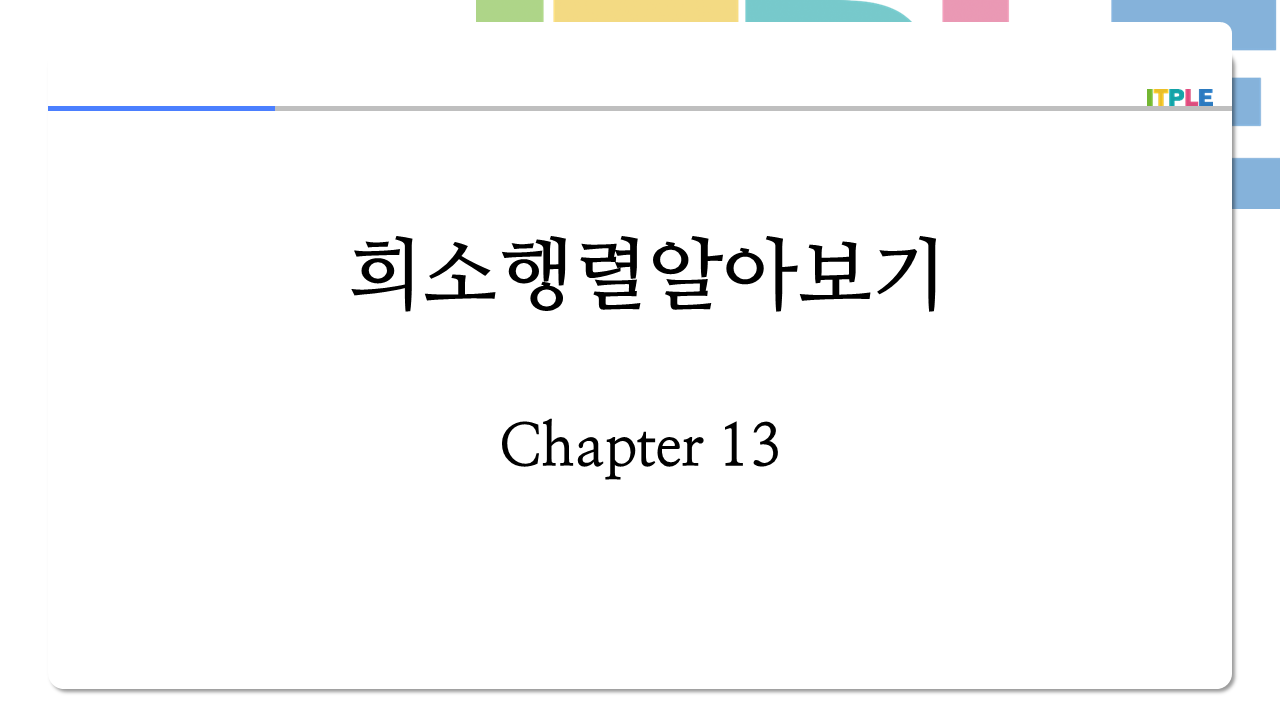

In [1]:
import numpy as np

In [2]:
np.__version__

'1.18.5'

In [3]:
import warnings

In [4]:
warnings.filterwarnings('ignore')

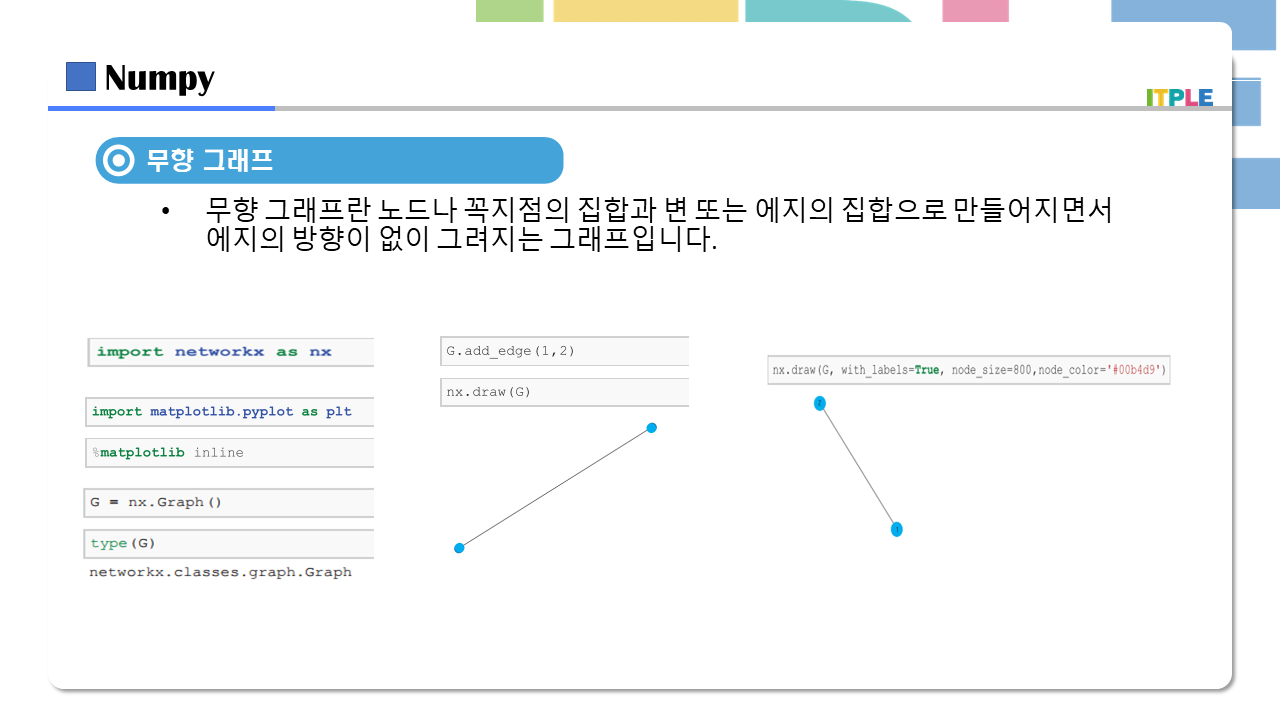

##  예제 13-1-1-1  방향없는 그래프 그리기

In [5]:
# !pip install networkx --upgrade

In [6]:
import networkx as nx

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
G = nx.Graph()

In [11]:
type(G)

networkx.classes.graph.Graph

In [12]:
G.add_edge(1,2)

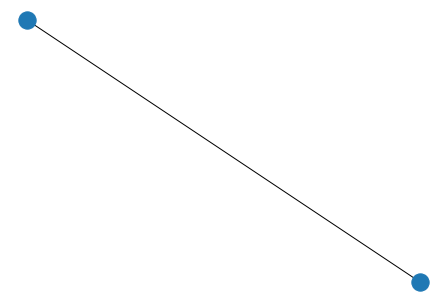

In [13]:
nx.draw(G)

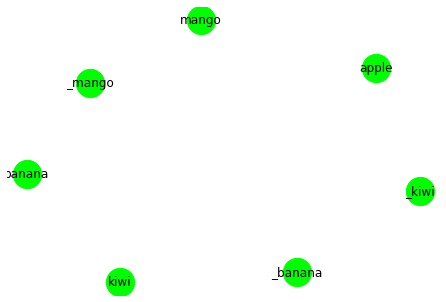

In [20]:
nx.draw(G, with_labels=True, node_size=800,node_color='#00ff00')

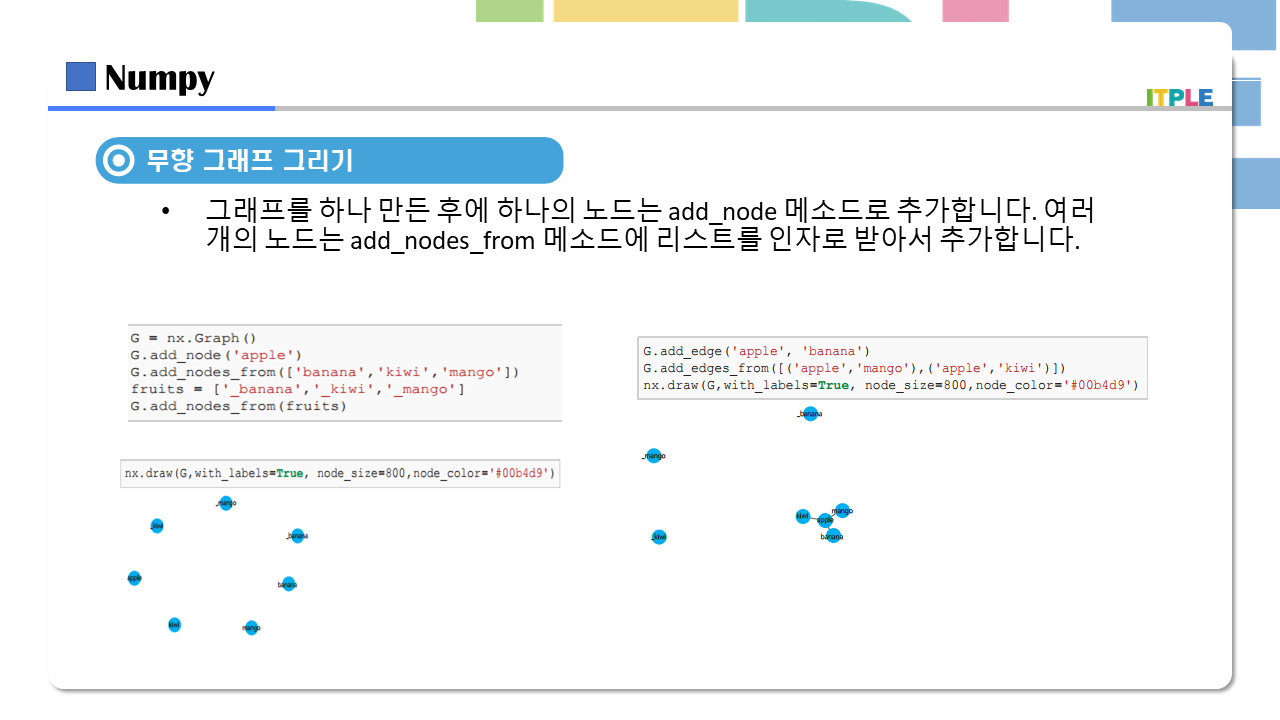

In [18]:
G = nx.Graph()
G.add_node('apple')   
G.add_nodes_from(['banana','kiwi','mango'])
fruits = ['_banana','_kiwi','_mango']
G.add_nodes_from(fruits)

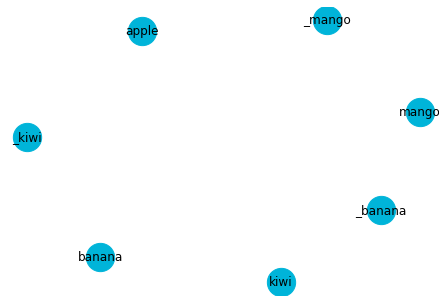

In [21]:
nx.draw(G,with_labels=True, node_size=800,node_color='#00b4d9')

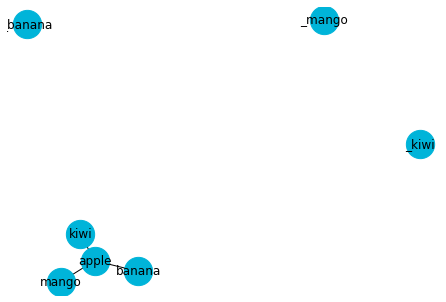

In [23]:
G.add_edge('apple', 'banana') 
G.add_edges_from([('apple','mango'),('apple','kiwi')])
nx.draw(G,with_labels=True, node_size=800,node_color='#00b4d9')

In [24]:
G.nodes

NodeView(('apple', 'banana', 'kiwi', 'mango', '_banana', '_kiwi', '_mango'))

In [25]:
G.edges

EdgeView([('apple', 'banana'), ('apple', 'mango'), ('apple', 'kiwi')])

In [26]:
pos_nodes = nx.spring_layout(G)

In [27]:
pos_nodes

{'apple': array([-0.01542878,  0.6402547 ]),
 'banana': array([-0.17742844,  0.54285075]),
 'kiwi': array([-0.04336795,  0.83813954]),
 'mango': array([0.17048395, 0.6008908 ]),
 '_banana': array([-0.67610887, -1.        ]),
 '_kiwi': array([-0.03505517, -0.90875092]),
 '_mango': array([ 0.77690526, -0.71338487])}

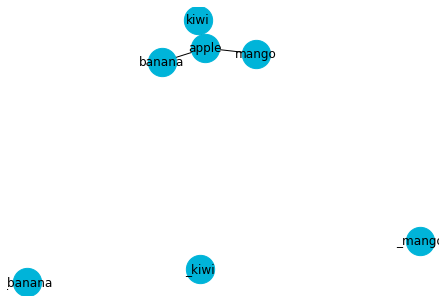

In [28]:
nx.draw(G, pos_nodes, with_labels=True, node_size=800,node_color='#00b4d9')

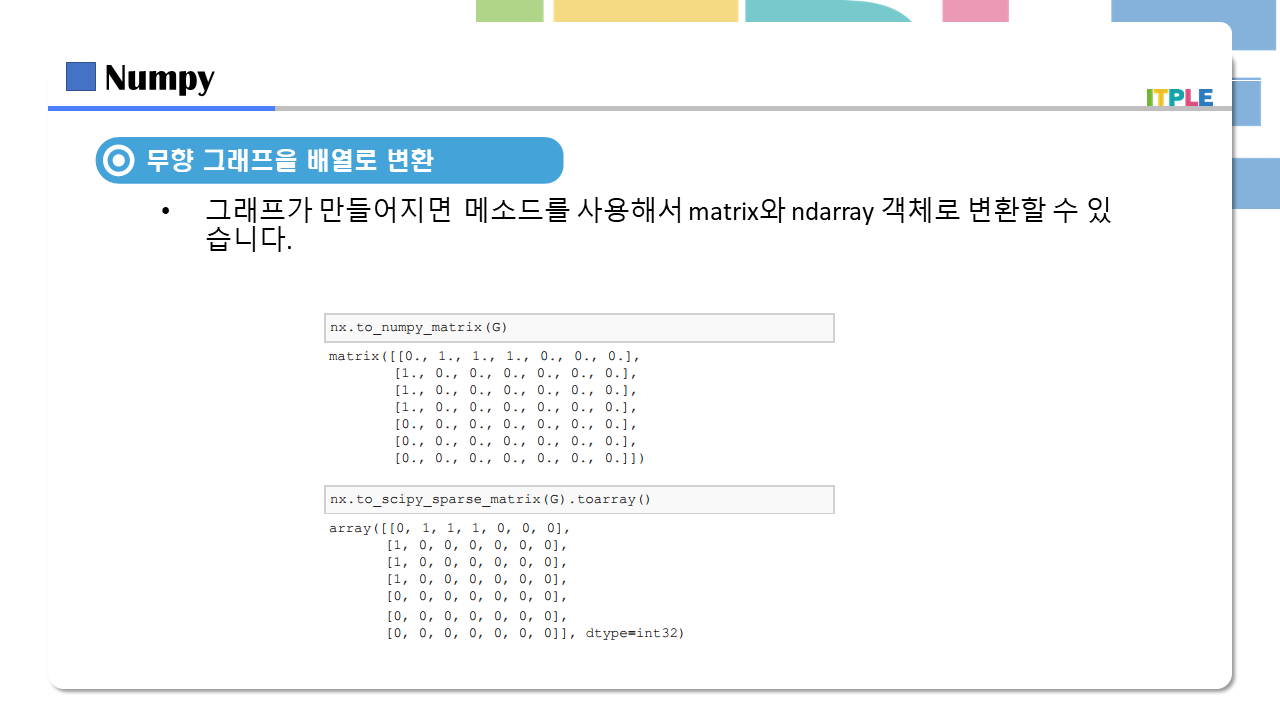

In [29]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 1., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])

In [30]:
nx.to_scipy_sparse_matrix(G).toarray()

array([[0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [31]:
G.degree()

DegreeView({'apple': 3, 'banana': 1, 'kiwi': 1, 'mango': 1, '_banana': 0, '_kiwi': 0, '_mango': 0})

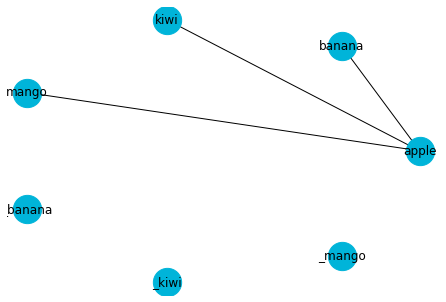

In [32]:
nx.draw_circular(G,with_labels=True, node_size=800,node_color='#00b4d9')

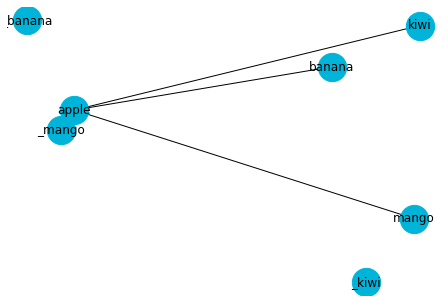

In [33]:
nx.draw_random(G, with_labels=True, node_size=800,node_color='#00b4d9')

##  예제 13-1-1-2 방향없는 그래프의 노드 꾸미기 

### 노드 개별 색상 및 개별  사이즈 처리

In [27]:
Gd = nx.Graph()

In [28]:
l = [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')]

In [29]:
Gd.add_edges_from(l)

In [30]:
len(plt.colormaps())

164

In [31]:
plt.get_cmap('jet')

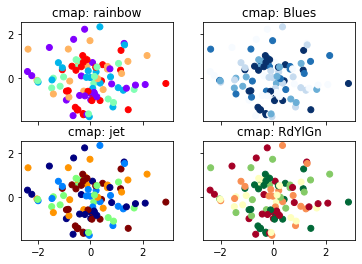

In [32]:
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
C = np.random.randint(0, 5, 100)
cmap_lst = [plt.cm.rainbow, plt.cm.Blues, plt.cm.jet, plt.cm.RdYlGn]

f, axes = plt.subplots(2, 2, sharex=True, sharey=True)
f.set_size_inches((6, 4)) 
k= 0
for i in range(0, 2):
    for j in range(0,2) :
        axes[i,j].scatter(X, Y, c=C, cmap=cmap_lst[k])
        axes[i,j].set_title("cmap: {}".format(cmap_lst[k].name))
        k += 1

In [33]:
val_map = {'A': 1.0,
           'D': 0.571,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in Gd.nodes()]

In [34]:
values

[1.0, 0.25, 0.25, 0.571, 0.25, 0.25, 0.0, 0.25]

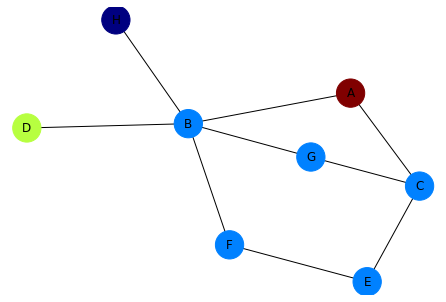

In [35]:
nx.draw(Gd, node_size=800,with_labels=True,cmap=plt.get_cmap('jet'), node_color=values)

In [36]:
nodes = range(10)
node_sizes = []
labels = {}
for n in nodes:
        node_sizes.append( 100 * (n+2) )
        labels[n] = 100 * n

In [37]:
node_sizes

[200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]

In [38]:
labels

{0: 0, 1: 100, 2: 200, 3: 300, 4: 400, 5: 500, 6: 600, 7: 700, 8: 800, 9: 900}

In [39]:
edges = [ (i, i+1) for i in range(len(nodes)-1) ]

In [40]:
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

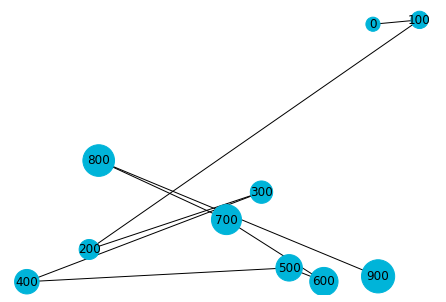

In [41]:
nx.draw_random(g, node_size = node_sizes, labels=labels, with_labels=True, node_color='#00b4d9') 

In [42]:
A = nx.to_scipy_sparse_matrix(g)

In [43]:
A

<10x10 sparse matrix of type '<class 'numpy.intc'>'
	with 18 stored elements in Compressed Sparse Row format>

In [44]:
A.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [45]:
A.todense()

matrix([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int32)

##  예제 13-1-1-3 배열로 가져와서 방향없는 그래프 그리기

In [46]:
a = np.random.random_integers(0,1,size=100)

In [47]:
na = np.reshape(a,(10,10))

In [48]:
na

array([[0, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 0, 1, 1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1]])

In [49]:
D = nx.Graph(na)

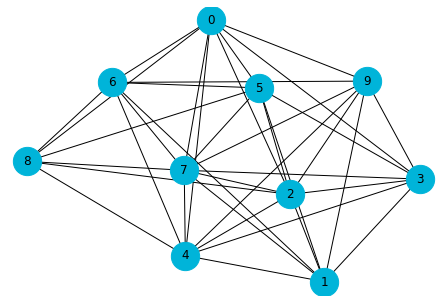

In [50]:
nx.draw(D, with_labels=True, node_size=800,node_color='#00b4d9')

In [51]:
D = nx.to_networkx_graph(na,create_using=nx.Graph())

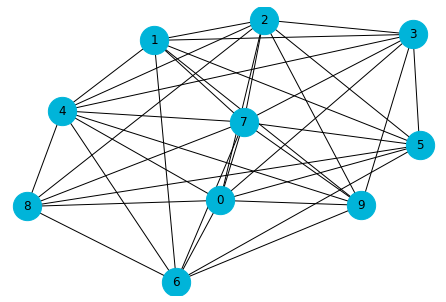

In [52]:
nx.draw(D, with_labels=True, node_size=800,node_color='#00b4d9')

In [53]:
di = np.diag([1,2,3,4])

In [54]:
di

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [55]:
di[1,0] = 1

In [56]:
di[1,2] = 1

In [57]:
di[1,3] = 1

In [58]:
di

array([[1, 0, 0, 0],
       [1, 2, 1, 1],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [59]:
gdi = nx.to_networkx_graph(di,create_using=nx.Graph())

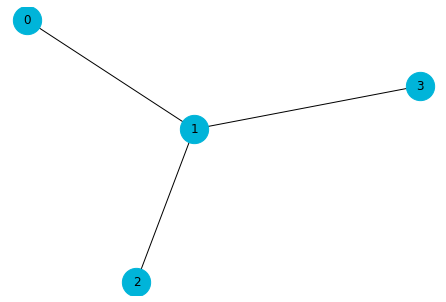

In [60]:
nx.draw(gdi, with_labels=True, node_size=800,node_color='#00b4d9')

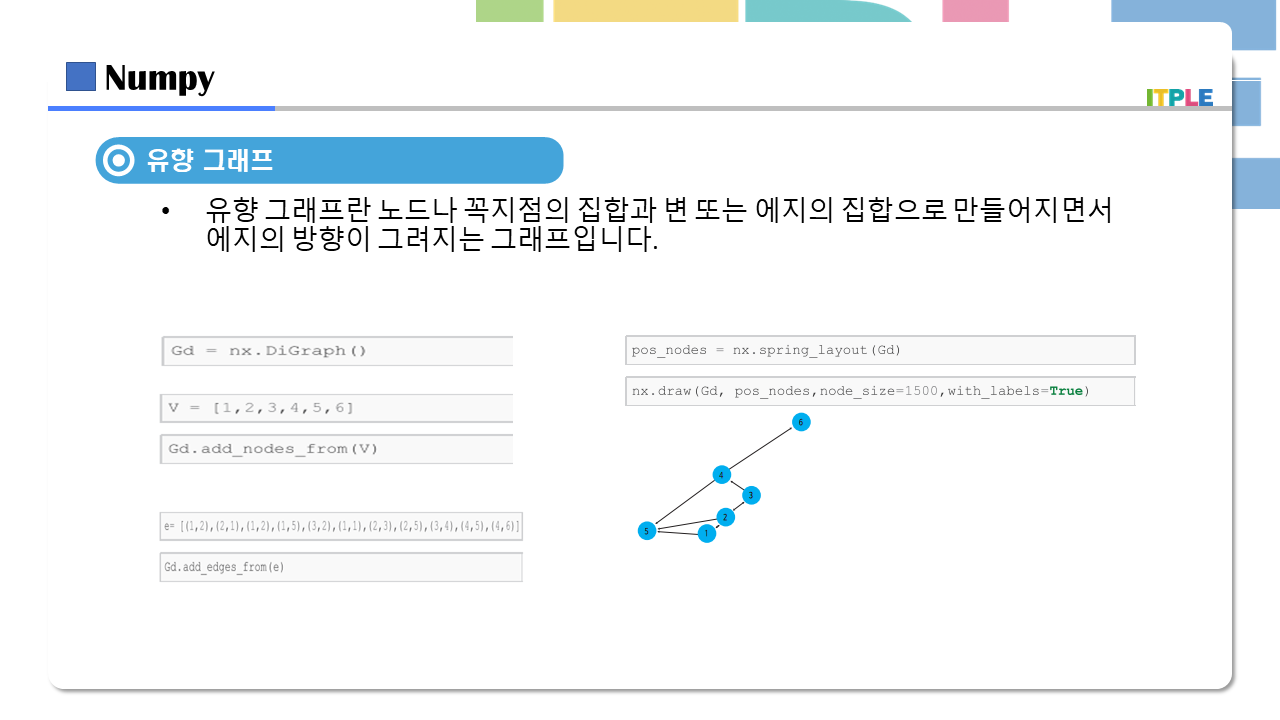

In [34]:
Gd = nx.DiGraph()

In [35]:
V = [1,2,3,4,5,6]

In [36]:
Gd.add_nodes_from(V)

In [37]:
e= [(1,2),(2,1),(1,2),(1,5),(3,2),(1,1),(2,3),(2,5),(3,4),(4,5),(4,6)]

In [38]:
Gd.add_edges_from(e)

In [39]:
pos_nodes = nx.spring_layout(Gd)

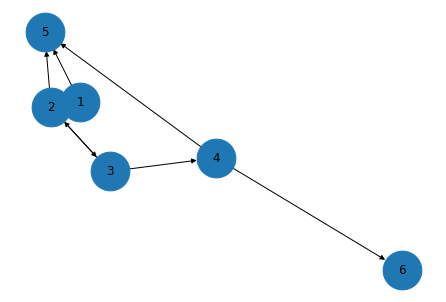

In [40]:
nx.draw(Gd, pos_nodes,node_size=1500,with_labels=True)

In [41]:
nx.to_numpy_matrix(Gd)

matrix([[1., 1., 0., 0., 1., 0.],
        [1., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [42]:
a = nx.adjacency_matrix(Gd)

In [43]:
a.data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [44]:
a.todense()

matrix([[1, 1, 0, 0, 1, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 1, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int32)

# 예제 13-1-2-2 방향그래프 꾸미기

In [45]:
G = nx.DiGraph()

In [46]:
G.add_edges_from([('A', 'B'),('C','D'),('G','D')], weight=1)
G.add_edges_from([('D','A'),('D','E'),('B','D'),('D','E')], weight=2)
G.add_edges_from([('B','C'),('E','F')], weight=3)
G.add_edges_from([('C','F')], weight=4)

In [47]:
val_map = {'A': 1.0,'D': 0.5714285714285714,'H': 0.0}

In [48]:
values = [val_map.get(node, 0.45) for node in G.nodes()]

In [49]:
red_edges = [('C','D'),('D','A')]

In [50]:
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

In [51]:
edge_colors

['black', 'black', 'black', 'red', 'black', 'red', 'black', 'black', 'black']

In [52]:
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])

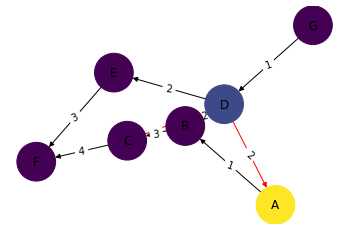

In [53]:
pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors, with_labels=True)

In [54]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 3., 2., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 4.],
        [2., 0., 0., 0., 0., 2., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 3.],
        [0., 0., 0., 0., 0., 0., 0.]])

In [55]:
sp = nx.to_scipy_sparse_matrix(G)

In [56]:
sp.toarray()

array([[0, 1, 0, 0, 0, 0, 0],
       [0, 0, 3, 2, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 4],
       [2, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

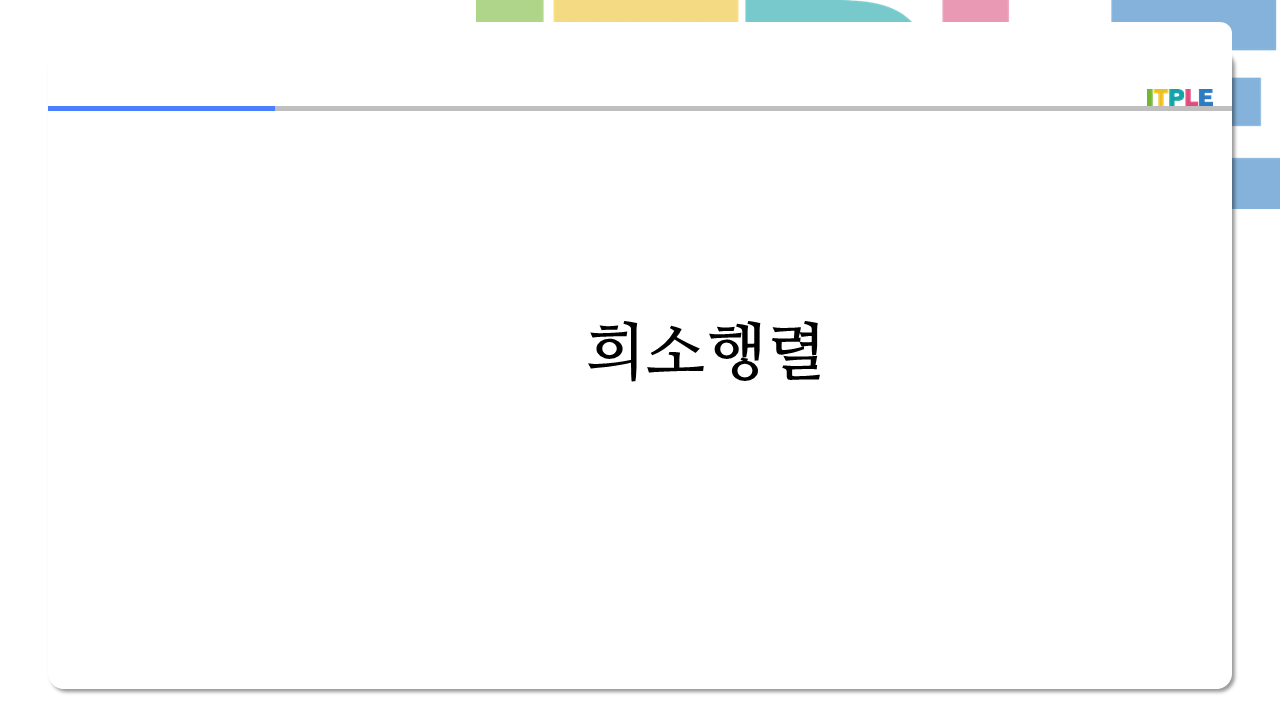

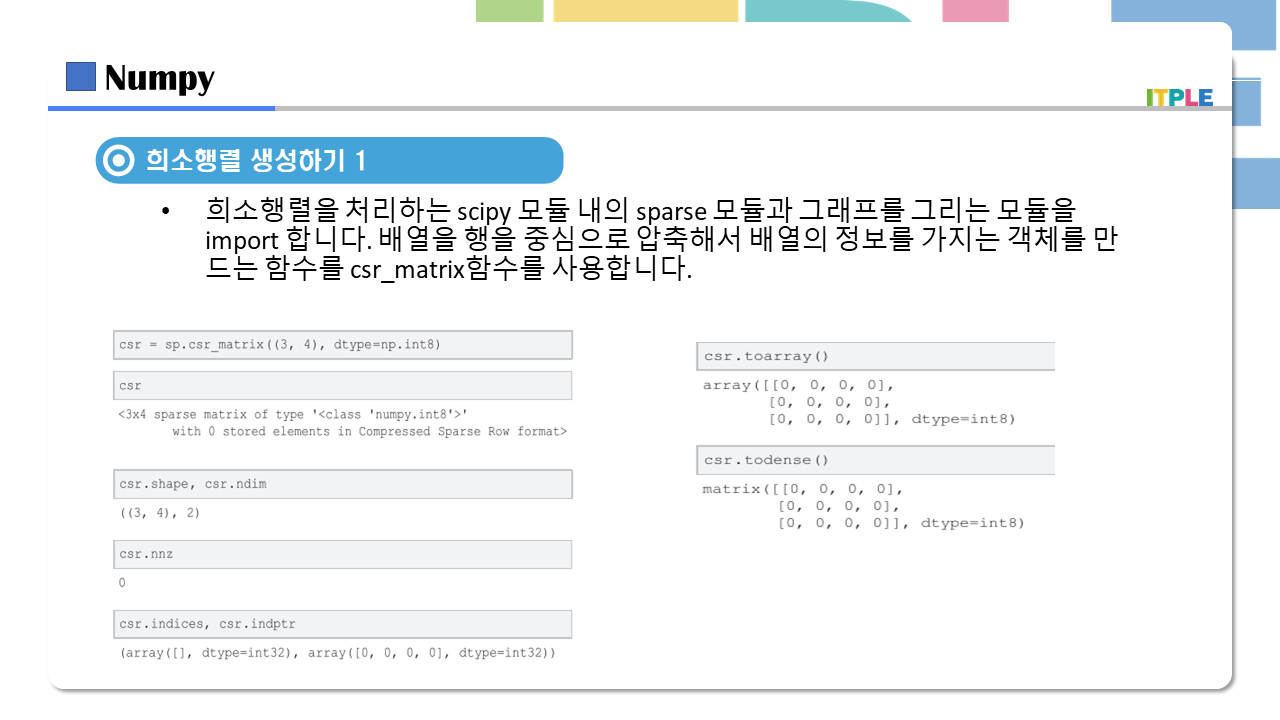

# 예제 13-2-1-1 희소행렬 알아보기


In [57]:
from scipy  import sparse as sp

In [58]:
csr = sp.csr_matrix((3, 4), dtype=np.int8)

In [59]:
csr

<3x4 sparse matrix of type '<class 'numpy.int8'>'
	with 0 stored elements in Compressed Sparse Row format>

In [60]:
csr.shape, csr.ndim

((3, 4), 2)

In [61]:
csr.nnz

0

In [62]:
csr.indices, csr.indptr

(array([], dtype=int32), array([0, 0, 0, 0], dtype=int32))

In [63]:
csr.toarray()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int8)

In [64]:
csr.todense()

matrix([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int8)

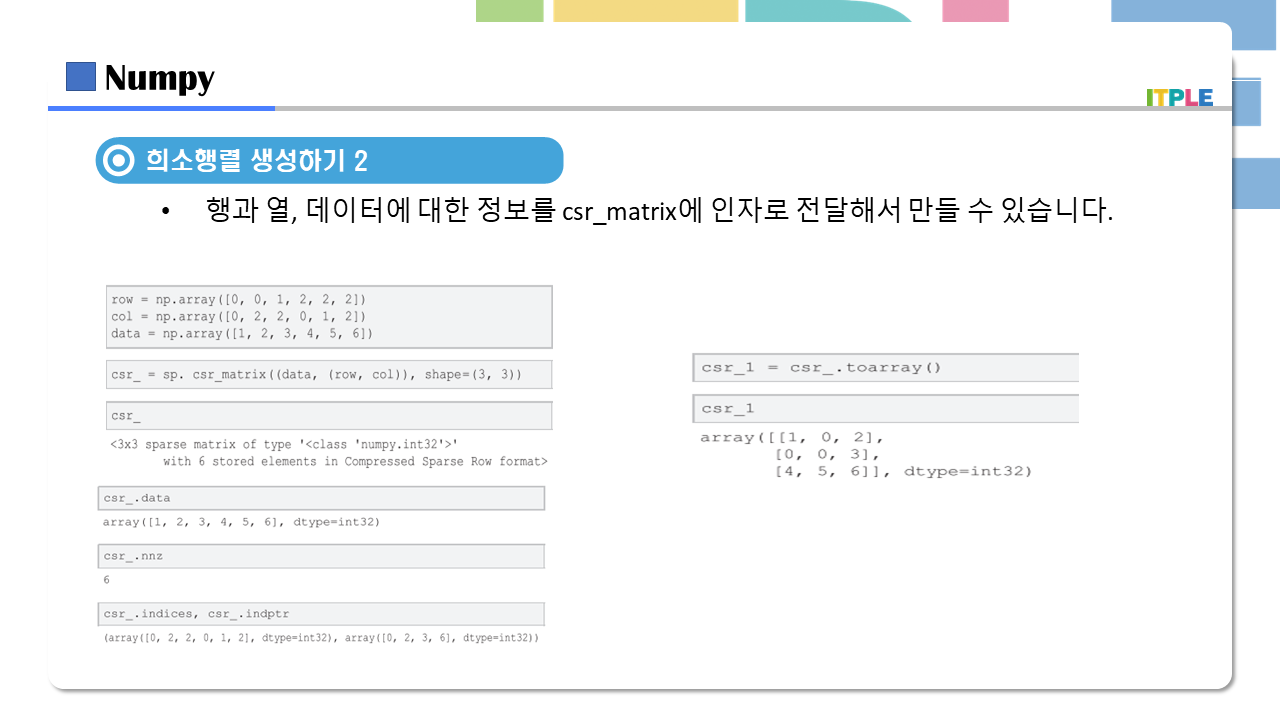

# 실제 데이터와 데이터의 위치를 지정

In [65]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])

In [66]:
csr_ = sp. csr_matrix((data, (row, col)), shape=(3, 3))

In [67]:
csr_

<3x3 sparse matrix of type '<class 'numpy.intc'>'
	with 6 stored elements in Compressed Sparse Row format>

In [68]:
csr_.data

array([1, 2, 3, 4, 5, 6], dtype=int32)

In [69]:
csr_.nnz

6

In [70]:
csr_.indices, csr_.indptr

(array([0, 2, 2, 0, 1, 2], dtype=int32), array([0, 2, 3, 6], dtype=int32))

In [71]:
csr_1 = csr_.toarray()

In [72]:
csr_1

array([[1, 0, 2],
       [0, 0, 3],
       [4, 5, 6]], dtype=int32)

In [73]:
G = nx.from_scipy_sparse_matrix(csr_, create_using=nx.Graph())

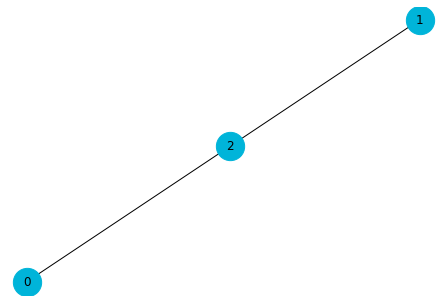

In [74]:
nx.draw(G, with_labels=True, node_size=800,node_color='#00b4d9')

In [75]:
x = np.array([[1,0,0,0],[0,3,0,0] ,[0,1,1,0], [1,0,0,1]])

In [76]:
x

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [77]:
a = sp.csr_matrix(x)

In [78]:
a

<4x4 sparse matrix of type '<class 'numpy.intc'>'
	with 6 stored elements in Compressed Sparse Row format>

In [79]:
for i in a :
    print(i)

  (0, 0)	1
  (0, 1)	3
  (0, 1)	1
  (0, 2)	1
  (0, 0)	1
  (0, 3)	1


In [80]:
a.toarray()

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]], dtype=int32)

In [81]:
Ga = nx.from_scipy_sparse_matrix(a, create_using=nx.Graph())

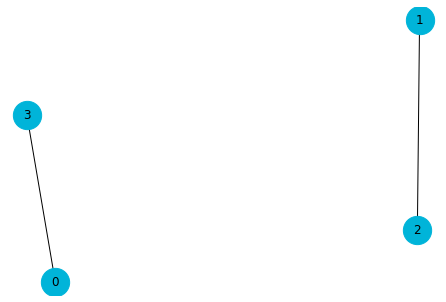

In [82]:
nx.draw(Ga, with_labels=True, node_size=800,node_color='#00b4d9')

In [83]:
GA = nx.from_scipy_sparse_matrix(a, parallel_edges=True,create_using=nx.MultiDiGraph())

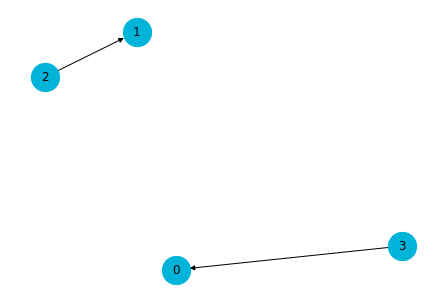

In [84]:
nx.draw(GA, with_labels=True, node_size=800,node_color='#00b4d9')

# csc

In [85]:
b = sp.csc_matrix(x)

In [86]:
b

<4x4 sparse matrix of type '<class 'numpy.intc'>'
	with 6 stored elements in Compressed Sparse Column format>

In [87]:
for i in b :
    print(i)

  (0, 0)	1
  (0, 1)	3
  (0, 1)	1
  (0, 2)	1
  (0, 0)	1
  (0, 3)	1


In [88]:
b.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]], dtype=int32)

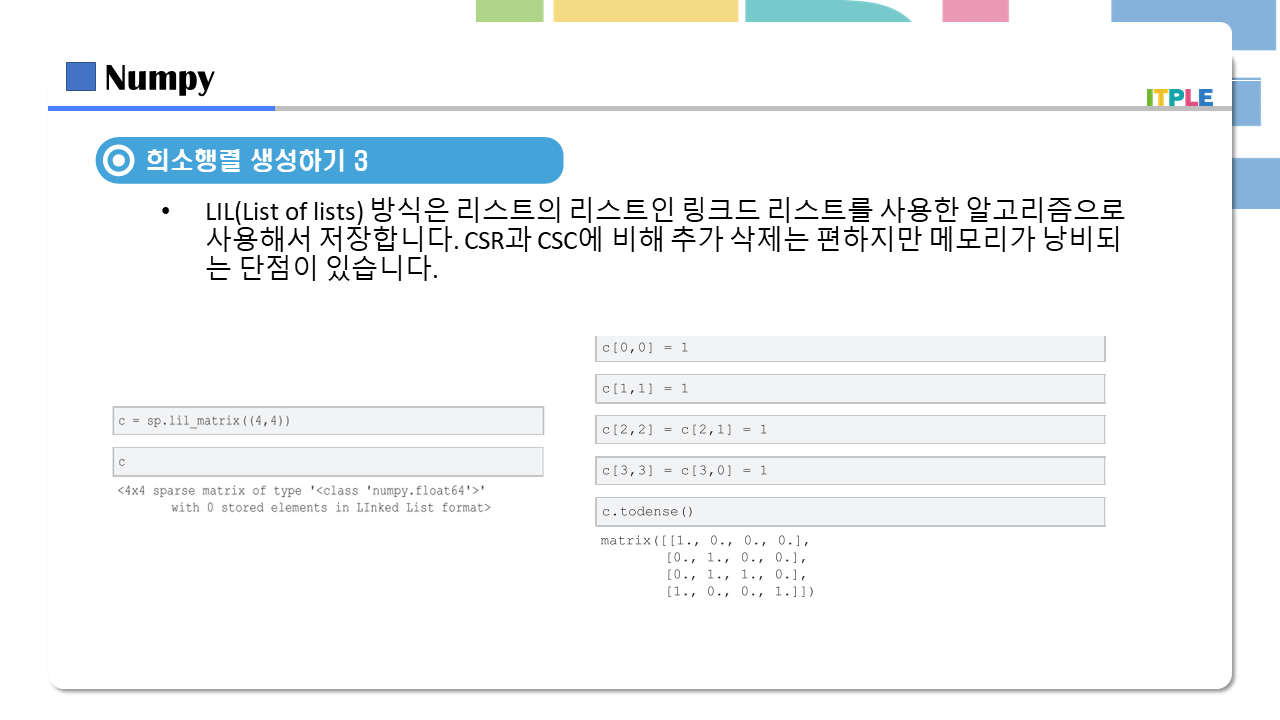

# lil

In [89]:
c = sp.lil_matrix((4,4))

In [90]:
c

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in List of Lists format>

In [91]:
c.data


array([list([]), list([]), list([]), list([])], dtype=object)

In [92]:
c[0,0] = 1

In [93]:
c[1,1] = 1

In [94]:
c[2,2] = c[2,1] = 1

In [95]:
c[3,3] = c[3,0] = 1

In [96]:
c.todense()

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [97]:
Gc = nx.from_scipy_sparse_matrix(c, create_using=nx.Graph())

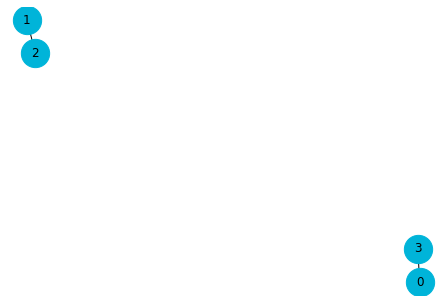

In [98]:
nx.draw(Gc, with_labels=True, node_size=800,node_color='#00b4d9')

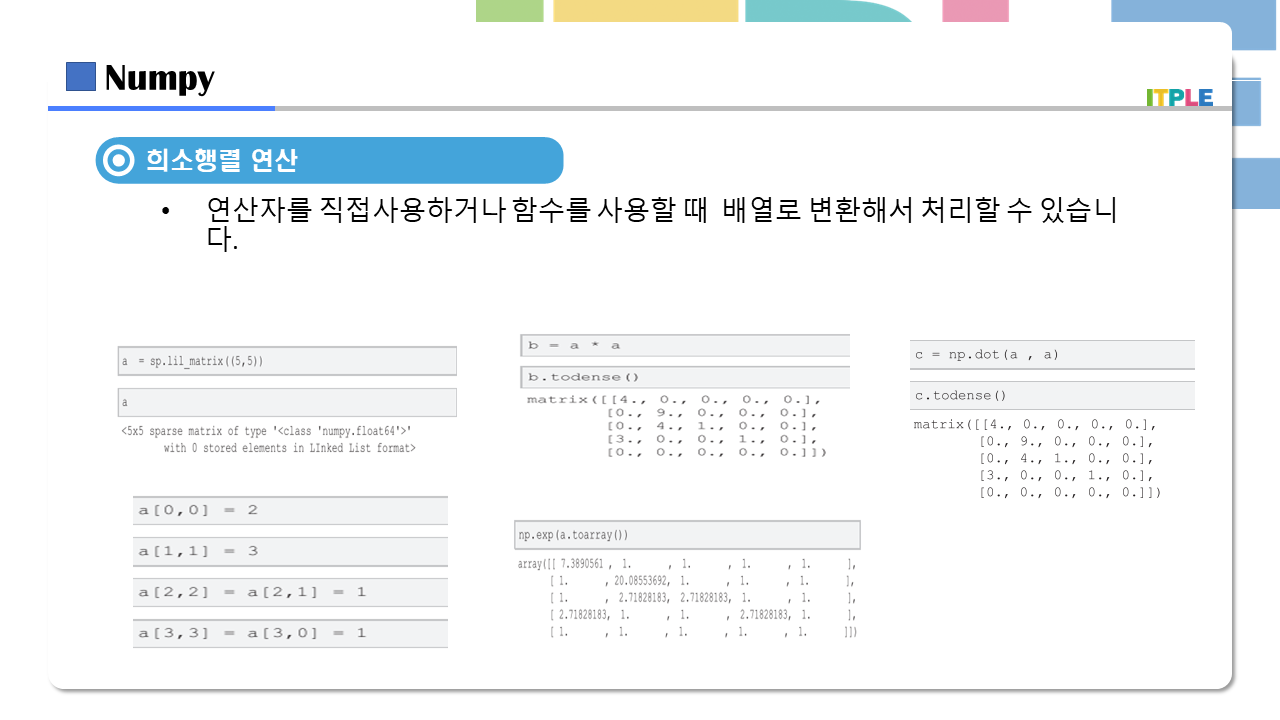

# 예제 13-2-2-1 희소행렬 연산 알아보기

In [99]:
a  = sp.lil_matrix((5,5))

In [100]:
a

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in List of Lists format>

In [101]:
a[0,0] = 2

In [102]:
a[1,1] = 3

In [103]:
a[2,2] = a[2,1] = 1

In [104]:
a[3,3] = a[3,0] = 1

In [105]:
b = a * a

In [106]:
b.todense()

matrix([[4., 0., 0., 0., 0.],
        [0., 9., 0., 0., 0.],
        [0., 4., 1., 0., 0.],
        [3., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.]])

In [107]:
np.exp(a.toarray())

array([[ 7.3890561 ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        , 20.08553692,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  2.71828183,  2.71828183,  1.        ,  1.        ],
       [ 2.71828183,  1.        ,  1.        ,  2.71828183,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [108]:
c = np.dot(a , a)

In [109]:
c.todense()

matrix([[4., 0., 0., 0., 0.],
        [0., 9., 0., 0., 0.],
        [0., 4., 1., 0., 0.],
        [3., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.]])

In [110]:
d = a.todense()

In [111]:
d

matrix([[2., 0., 0., 0., 0.],
        [0., 3., 0., 0., 0.],
        [0., 1., 1., 0., 0.],
        [1., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.]])

In [112]:
np.dot(d,d)

matrix([[4., 0., 0., 0., 0.],
        [0., 9., 0., 0., 0.],
        [0., 4., 1., 0., 0.],
        [3., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0.]])